In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('ahs2017n.csv')

In [5]:
housing['YRBUILT']=housing['YRBUILT'].replace(1919, 1910)

In [6]:
#removing quotes from ordinal unit square footage increments
housing['UNITSIZE'] = housing['UNITSIZE'].str.replace("'", '')

In [7]:
#change ordinal string of UNITSIZE to integer 
housing['UNITSIZE'] = housing['UNITSIZE'].astype(int)

In [8]:
housing[['UNITSIZE']].head()

,UNITSIZE
0,6
1,8
2,6
3,4
4,7


In [9]:
housing[['UNITSIZE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66752 entries, 0 to 66751
Data columns (total 1 columns):
UNITSIZE    66752 non-null int32
dtypes: int32(1)
memory usage: 260.8 KB


In [10]:
#removing quotes from original DF housing
housing['BATHROOMS'] = housing['BATHROOMS'].str.replace("'", '')

In [11]:
#change ordinal string of BATHROOMS to integer
housing['BATHROOMS'] = housing['BATHROOMS'].astype(int)

In [12]:
#checking change
housing[['BATHROOMS']].head()

,BATHROOMS
0,4
1,4
2,5
3,3
4,4


In [13]:
#replacing 7-13 codes with 0, no complete bathroom
housing['BATHROOMS']=housing['BATHROOMS'].replace([7,8,9,10,11,12,13], 0)

In [14]:
#change ordinal string of DINING to integer
housing['DINING'] = housing['DINING'].astype(int)

In [15]:
#assign selection of columns (variables) of interest
houses= housing[['BLD', 'CONTROL', 'DIVISION', 'OMB13CBSA', 'TENURE', 'YRBUILT', 'UNITSIZE', 'TOTROOMS', 'UNITFLOORS','BEDROOMS','BATHROOMS','DINING','FIREPLACE', 'GARAGE']]


In [16]:
print(houses.head())

    BLD     CONTROL DIVISION OMB13CBSA TENURE  YRBUILT  UNITSIZE  TOTROOMS  \
0  '02'  '11000001'      '5'   '37980'    '1'     2000         6         8   
1  '03'  '11000002'      '1'   '99998'    '1'     1970         8         7   
2  '02'  '11000005'      '7'   '99998'    '1'     1970         6         8   
3  '02'  '11000006'      '7'   '99998'    '1'     1980         4         5   
4  '02'  '11000007'      '5'   '37980'    '1'     1960         7         8   

   UNITFLOORS  BEDROOMS  BATHROOMS  DINING FIREPLACE GARAGE  
0           2         3          4       1       '1'    '1'  
1           2         3          4       1       '2'    '1'  
2           1         4          5       1       '2'    '1'  
3           1         3          3       0       '2'    '1'  
4           3         4          4       1       '2'    '1'  


In [17]:
print(type(houses))

<class 'pandas.core.frame.DataFrame'>


In [18]:
houses[['UNITSIZE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66752 entries, 0 to 66751
Data columns (total 1 columns):
UNITSIZE    66752 non-null int32
dtypes: int32(1)
memory usage: 260.8 KB


In [19]:
houses.UNITSIZE.max()

9

In [20]:
#checking for no reports i.e. "-9"
houses.UNITSIZE.min()

-9

In [21]:
#Boolean to filter single family house values 
bld_sf = ["'02'", "'03'"]
houses.BLD.isin(bld_sf).head(20)

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13    False
14    False
15    False
16     True
17     True
18     True
19    False
Name: BLD, dtype: bool

In [22]:
#checking rows and columns
sfh = houses[houses.BLD.isin(bld_sf)]
sfh.shape

(43910, 14)

In [23]:
#import plotting library
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#count variables by regions (by US Census Divisions)
sfh.groupby('DIVISION').count()

,BLD,CONTROL,OMB13CBSA,TENURE,YRBUILT,UNITSIZE,TOTROOMS,UNITFLOORS,BEDROOMS,BATHROOMS,DINING,FIREPLACE,GARAGE
DIVISION,,,,,,,,,,,,,
'1',2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099
'2',4088,4088,4088,4088,4088,4088,4088,4088,4088,4088,4088,4088,4088
'3',6692,6692,6692,6692,6692,6692,6692,6692,6692,6692,6692,6692,6692
'4',2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174
'5',9296,9296,9296,9296,9296,9296,9296,9296,9296,9296,9296,9296,9296
'6',1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857
'7',5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907
'8',3281,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281,3281
'9',8516,8516,8516,8516,8516,8516,8516,8516,8516,8516,8516,8516,8516


In [25]:
#assigning a name for regions table
div_sf = sfh.groupby('DIVISION')

In [26]:
print(type(div_sf))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


(1910, 2010, 0.0, 6916.35)

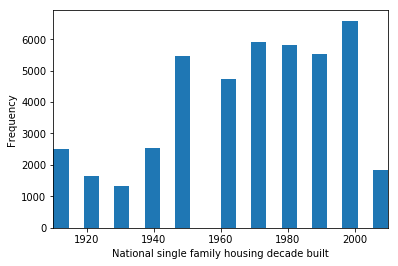

In [27]:
#Plot national distribution for decade built
sfh.YRBUILT.plot.hist(bins=22)
plt.xlabel('National single family housing decade built')
plt.axis(xmin= 1910, xmax=2010)

Plot depicts in 1910 bar, all the houses that were built by 1919 and 7 out of 10 years for the 2010 current decade.

In [28]:
#houses built by region in each decade
rdivbydec= sfh.groupby('YRBUILT').DIVISION.value_counts(normalize=True)

Text(0, 0.5, 'Region')

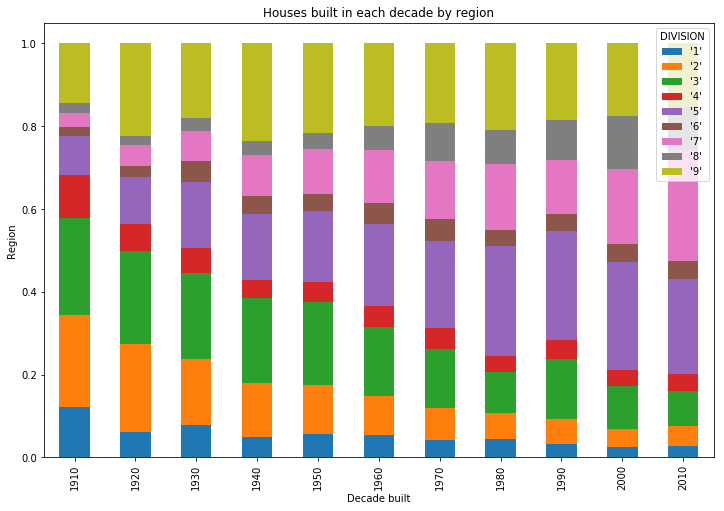

In [29]:
#Plot relative region housing for each decade
rdivbydec.unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Houses built in each decade by region')
plt.xlabel('Decade built')
plt.ylabel('Region')

Of the national stock, '5'-South Atlantic states show most sustained growth in new houses built in sample.

Text(0, 0.5, 'House counts in sample')

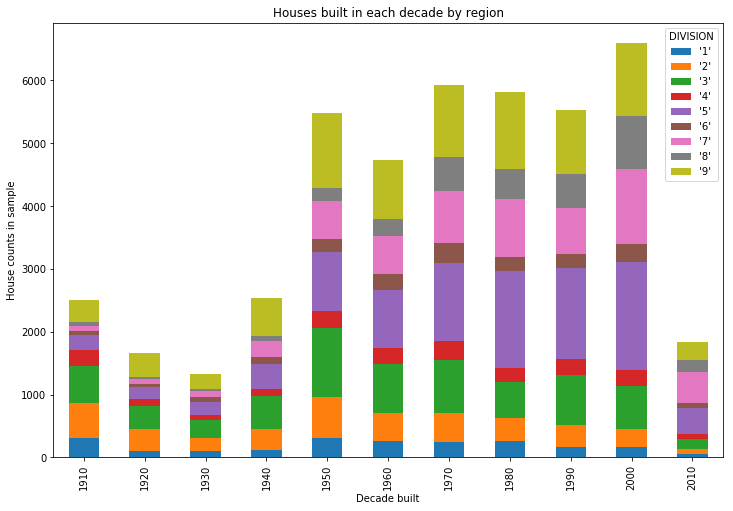

In [30]:
#Plot housing for each decade 
divbydec= sfh.groupby('YRBUILT').DIVISION.value_counts()
divbydec.unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Houses built in each decade by region')
plt.xlabel('Decade built')
plt.ylabel('House counts in sample')

In [31]:
#exploring year (decade) built by region
yr_counts=pd.DataFrame(div_sf['YRBUILT'].value_counts())
yr_counts

YRBUILT
DIVISION YRBUILT         
'1'      1910         304
         1950         304
         1980         263
         1960         259
         1970         249
         1990         173
         2000         169
         1940         125
         1930         103
         1920         101
         2010          49
'2'      1950         654
         1910         557
         1970         456
         1960         447
         1980         365
         1920         352
         1990         336
         1940         330
         2000         286
         1930         213
         2010          92
'3'      1950        1094
         1970         846
         1990         809
         1960         786
         2000         680
         1910         592
         1980         564
         1940         522
...                   ...
'7'      1990         728
         1960         610
         1950         592
         2010         492
         1940         256
         1930          98
         1920          86
         1910          85
'8'      2000         842
         1970         533
         1990         533
         1980         476
         1960         267
         1950         215
         2010         191
         1940          86
         1910          60
         1930          42
         1920          36
'9'      1980        1212
         1950        1188
         2000        1152
         1970        1147
         1990        1019
         1960         951
         1940         595
         1920         369
         1910         363
         2010         281
         1930         239

[99 rows x 1 columns]

Text(0.5, 1.0, 'Decade built by region')

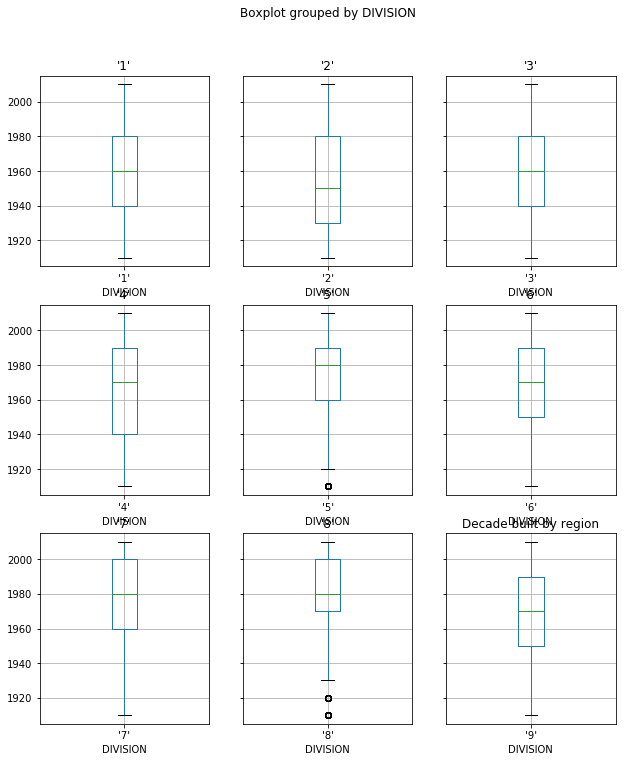

In [32]:
#plot decade built by region
div_sf.boxplot(column= 'YRBUILT', by= 'DIVISION', subplots=True, figsize=(10,12))
plt.title('Decade built by region')

Boxplots reflect regional variation in when the housing stock was built.

In [72]:
#Median decade houses were built by region
rgn_mdecade= pd.DataFrame(sfh.groupby('DIVISION')['YRBUILT'].median()).reset_index().rename(columns={'DIVISION':'Region', 'YRBUILT':'Median decade built'})
rgn_mdecade

,Region,Median decade built
0,'1',1960
1,'2',1950
2,'3',1960
3,'4',1970
4,'5',1980
5,'6',1970
6,'7',1980
7,'8',1980
8,'9',1970


Regional medians decades for houses built falls from 1950-1980.

In [34]:
#Creade data grouped by decade
dec_sf= sfh.groupby('YRBUILT')
dec_sf

AttributeError: module 'matplotlib.pyplot' has no attribute 'yticklabels'

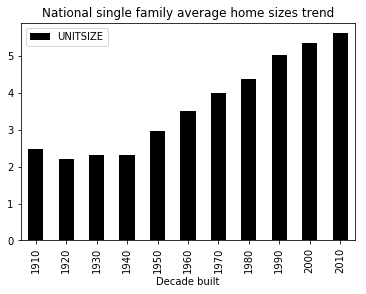

In [41]:
#plot national average unit size by decade
unitsz_yr = sfh.groupby('YRBUILT').mean().reset_index()
unitsz_yr.plot.bar(x='YRBUILT', y='UNITSIZE', color='black')
plt.title('National single family average home sizes trend')
plt.xlabel('Decade built')
#plt.yticks()
plt.yticklabels({'0':'0', '1':'up to 500', '2':'500 to 749', '3':'750 to 999', '4':'1000 to 1499', '5':'1500 to 1999'})

Text(0, 0.5, 'Total rooms')

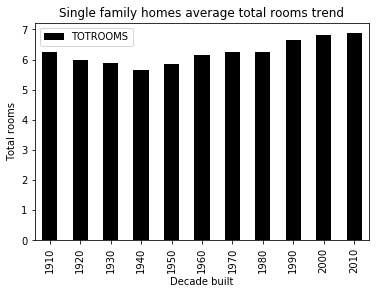

In [42]:
#plot national average number of rooms by decade
totrms_yr = sfh.groupby('YRBUILT').mean().reset_index()
totrms_yr.plot.bar(x='YRBUILT', y='TOTROOMS', color='black')
plt.title('Single family homes average total rooms trend')
plt.xlabel('Decade built')
plt.ylabel('Total rooms')

Total rooms appears loosely to trend with square footage of house size. 

In [44]:
#Importing libraries
import numpy as np
import seaborn as sns
import scipy.stats

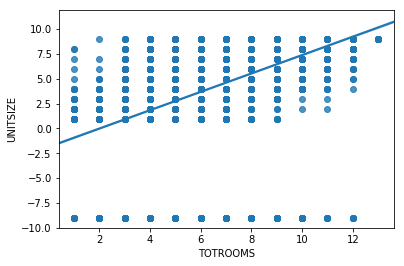

In [45]:
#checking relationship between number of rooms and square footage
sz_rm = sns.regplot(x='TOTROOMS', y='UNITSIZE', data=sfh)

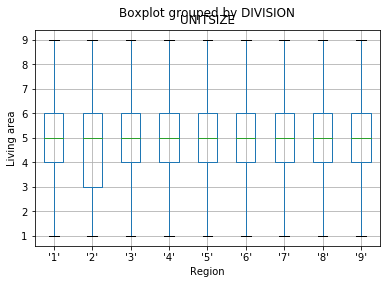

In [46]:
#Plot square footage by region
box_unitsz1 = sfh.boxplot(column='UNITSIZE', by= 'DIVISION', showfliers=False)
plt.xlabel('Region')
plt.ylabel('Living area')
box_unitsz1

Second quartile of Region 2 probably reflects density associated with metropolitan areas in Middle Atlantic states.

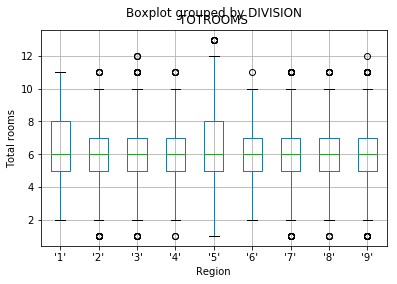

In [47]:
#Plot number of rooms by region
box_totrms = sfh.boxplot(column='TOTROOMS', by= 'DIVISION')
plt.xlabel('Region')
plt.ylabel('Total rooms')
box_totrms

([<matplotlib.axis.YTick at 0x27db2961c50>,
 <a list of 3 Text yticklabel objects>)

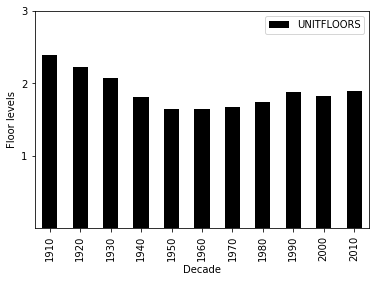

In [49]:
#Plot national mean of stories of houses by decade
flr_dec_m= sfh.groupby('YRBUILT')['UNITFLOORS'].mean().reset_index()
flr_dec_m.plot.bar(x='YRBUILT', y='UNITFLOORS', color='k')
plt.xlabel('Decade')
plt.ylabel('Floor levels')
plt.yticks(np.arange(1, 4, 1.0))

In [51]:
#Frequency of 1-, 2- & 3-story houses by decade
flr_dec= pd.DataFrame(dec_sf['UNITFLOORS'].value_counts())

In [52]:
#Unstack stories for decade
u_flr_dec= pd.DataFrame(flr_dec.unstack(level= 'UNITFLOORS'))
u_flr_dec

UNITFLOORS            
UNITFLOORS          1     2     3
YRBUILT                          
1910              420   689  1402
1920              416   445   792
1930              433   373   527
1940             1158   693   683
1950             2856  1656   963
1960             2426  1570   742
1970             2946  1972  1004
1980             2680  1966  1158
1990             2016  2156  1349
2000             2499  2743  1345
2010              602   817   413

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DB289D748>,
      dtype=object)

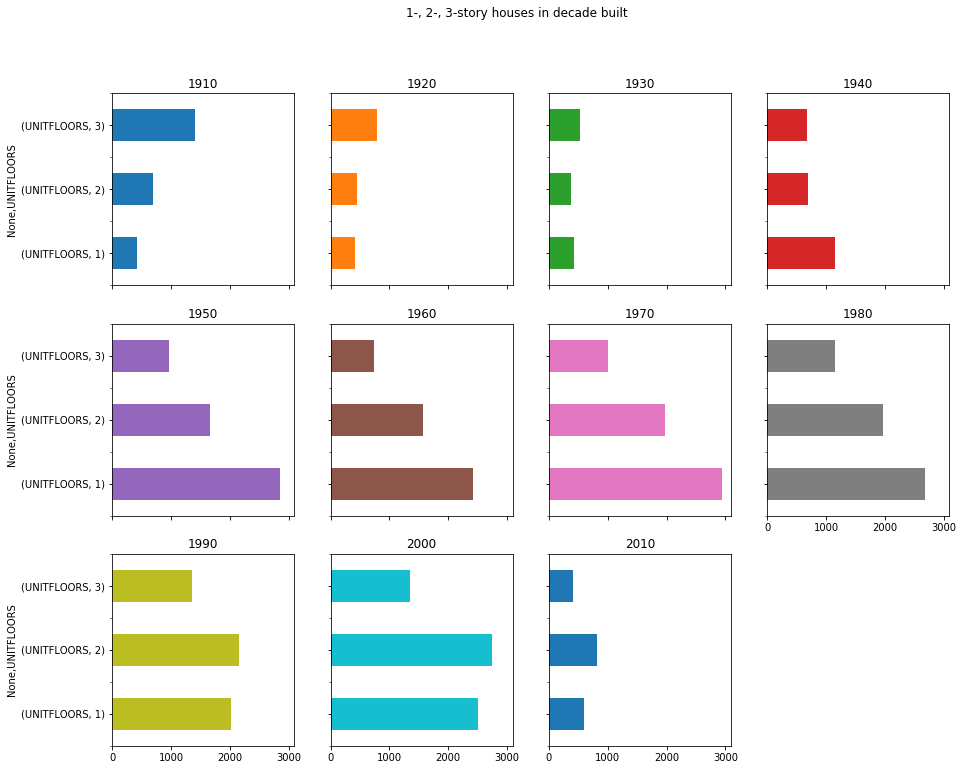

In [53]:
#Plot charts for 1, 2 and 3 floors for each decade
u_flr_dec.T.plot(subplots=True, kind='barh', figsize= (15,12), layout=(3,4), legend=False, sharey=True, title='1-, 2-, 3-story houses in decade built')

Variation in the number of floors over the decades may reflect suburban sprawl and "ranch" style houses in the middle of the century.

In [54]:
#Table: Median floors by region
pd.DataFrame(sfh.groupby('DIVISION')['UNITFLOORS'].median()).reset_index().rename(columns={'DIVISION':'Region', 'UNITFLOORS':'No. floors'})

,Region,No. floors
0,'1',3
1,'2',3
2,'3',2
3,'4',2
4,'5',2
5,'6',1
6,'7',1
7,'8',1
8,'9',1


In [55]:
#Frequency of 1-, 2- & 3-story houses by region
floors= pd.DataFrame(div_sf['UNITFLOORS'].value_counts()).rename(columns={'DIVISION':'Region', 'UNITFLOORS':'Number of floors'})

In [56]:
#Unstack unit floors for region
u_floors= pd.DataFrame(floors.unstack(level= 'UNITFLOORS'))
u_floors

Number of floors            
UNITFLOORS                1     2     3
DIVISION                               
'1'                     167   713  1219
'2'                     411  1265  2412
'3'                    1279  2693  2720
'4'                     482  1073   619
'5'                    4114  2975  2207
'6'                    1160   549   148
'7'                    4262  1545   100
'8'                    1982  1011   288
'9'                    4595  3256   665

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DBCADEE80>,
      dtype=object)

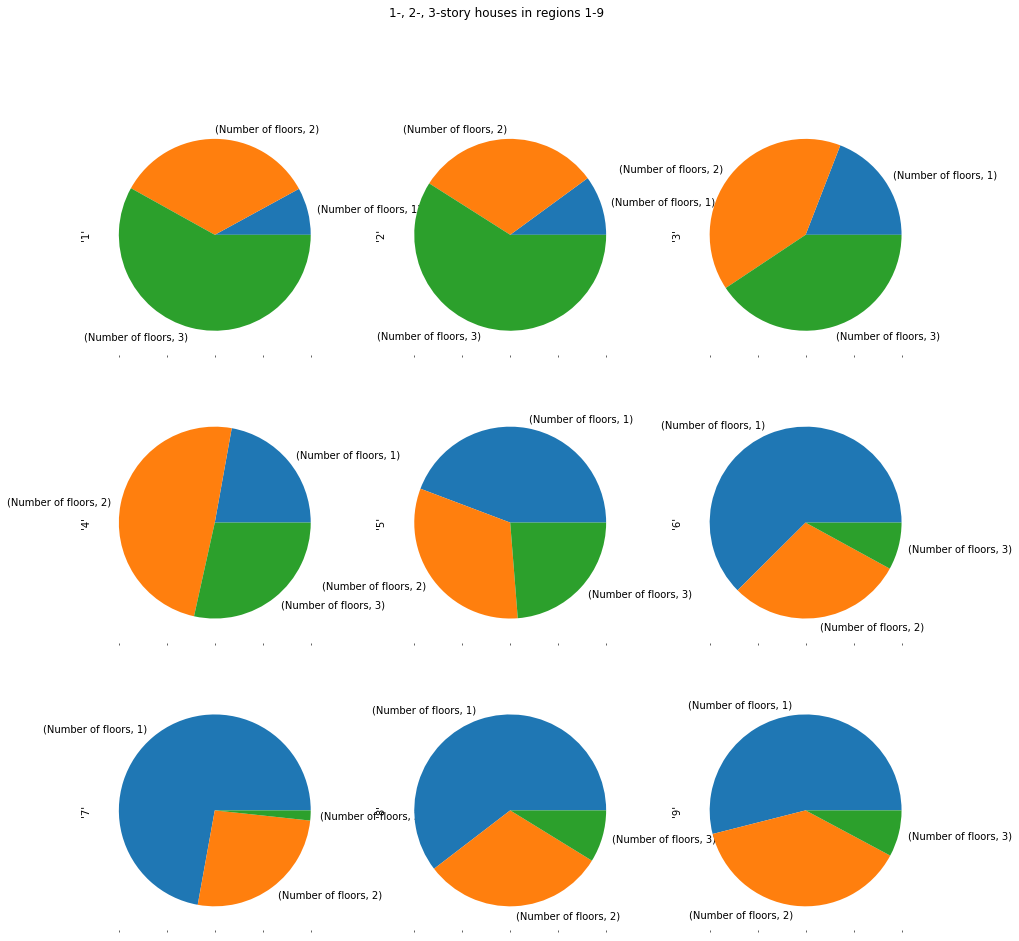

In [57]:
#plot pie charts for 1, 2 and 3 floors for each region
u_floors.T.plot.pie(subplots=True, figsize= (15,15), layout=(3,3), legend=False, title='1-, 2-, 3-story houses in regions 1-9')

Great variation in 1-, 2-, and 3-story houses between regions, displaying majorities in each respective category.

([<matplotlib.axis.XTick at 0x27ddd008dd8>,
 <a list of 3 Text xticklabel objects>)

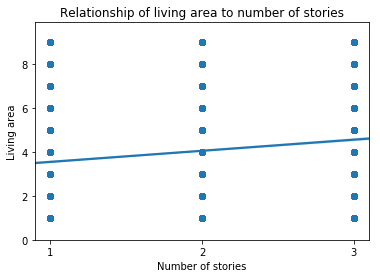

In [58]:
#checking the relative relationship between number of stories and square footage
sz_rm = sns.regplot(x='UNITFLOORS', y='UNITSIZE', data=sfh)
plt.axis(ymin=0)
plt.ylabel('Living area')
plt.xlabel('Number of stories')
plt.title('Relationship of living area to number of stories')
plt.xticks(np.arange(1, 4, 1.0))

([<matplotlib.axis.XTick at 0x27d84b6cf98>,
 <a list of 3 Text xticklabel objects>)

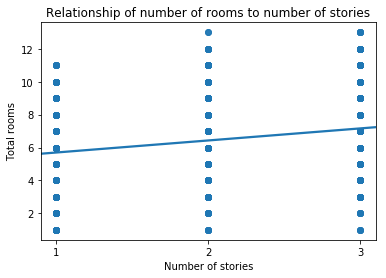

In [59]:
#checking the relative relationship between number of stories and total rooms
sz_rm = sns.regplot(x='UNITFLOORS', y='TOTROOMS', data=sfh)
plt.ylabel('Total rooms')
plt.xlabel('Number of stories')
plt.title('Relationship of number of rooms to number of stories')
plt.xticks(np.arange(1, 4, 1.0))

In [60]:
#frequency of seperate dining rooms in regions
dr_div=div_sf['DINING'].value_counts()

In [61]:
#Unstack DINING for region
u_dr_div= pd.DataFrame(dr_div.unstack(level= 'DINING'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DFBDE1160>,
      dtype=object)

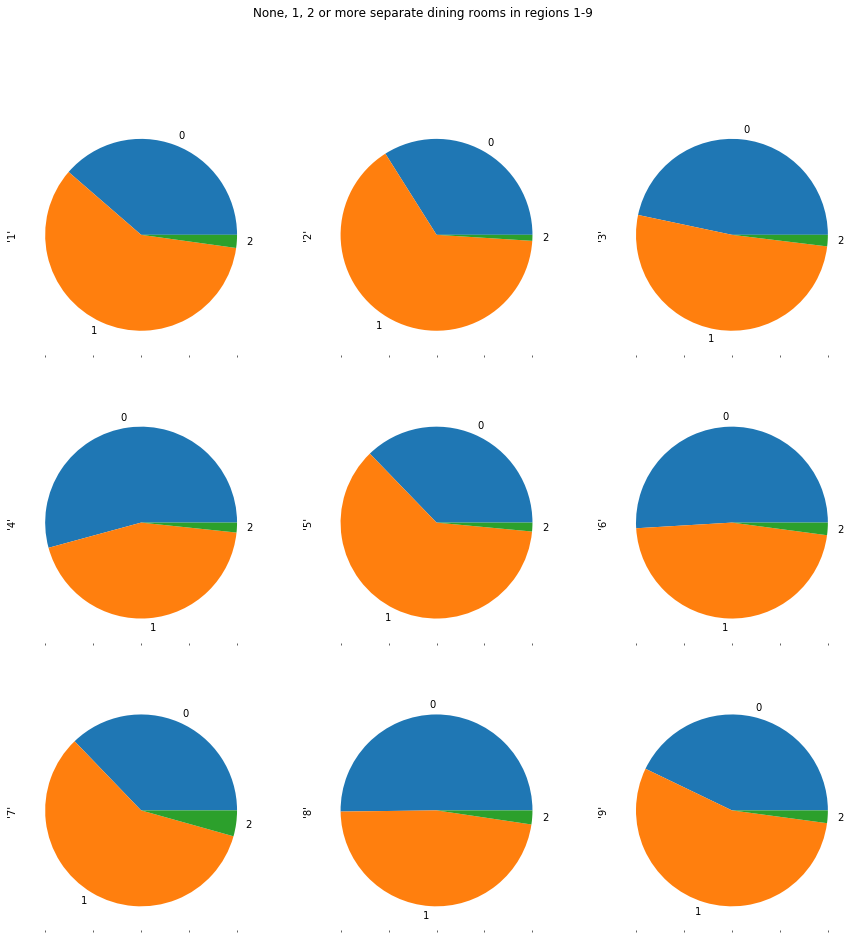

In [62]:
u_dr_div.T.plot.pie(subplots=True, figsize= (15,15), layout=(3,3), legend=False, title='None, 1, 2 or more separate dining rooms in regions 1-9')

([<matplotlib.axis.XTick at 0x27d8ee2a080>,
 <a list of 3 Text xticklabel objects>)

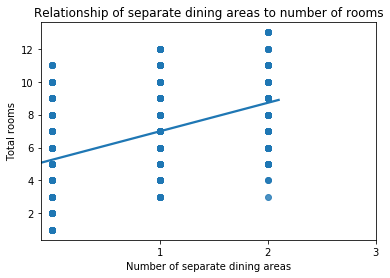

In [63]:
#checking relationship between separate dining areas and total rooms
sz_rm = sns.regplot(x='DINING', y='TOTROOMS', data=sfh)
plt.ylabel('Total rooms')
plt.xlabel('Number of separate dining areas')
plt.title('Relationship of separate dining areas to number of rooms')
plt.xticks(np.arange(1, 4, 1.0))

The frequency of separate dining rooms and the below characteristics make up trends between regions over time.

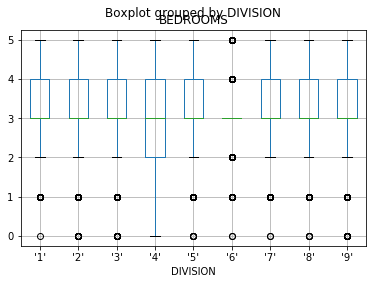

In [64]:
#plot other characteristics, bedroom counts by region
box_bedrms1 = sfh.boxplot(column= 'BEDROOMS', by= 'DIVISION')
box_bedrms1

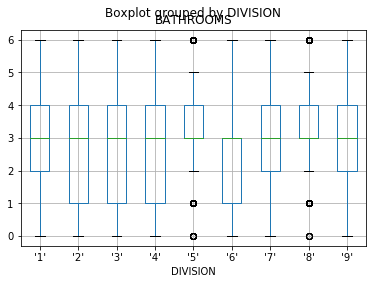

In [65]:
#plot bathrooms by region, 7-13 = 0 complete baths
box_baths = sfh.boxplot(column= 'BATHROOMS', by= 'DIVISION')
box_baths

Single family housing characteristics in the 15 largest metropolitan areas 

In [66]:
#START 15 metropololitans area for comparison to regions
div_sf['OMB13CBSA'].value_counts()

DIVISION  OMB13CBSA
'1'       '14460'      1179
          '99998'       694
          '99999'       226
'2'       '37980'      1493
          '99998'      1276
          '35620'       999
          '99999'       320
'3'       '99998'      2337
          '19820'      1868
          '16980'      1385
          '99999'      1102
'4'       '99998'      1259
          '99999'       915
'5'       '99998'      3574
          '47900'      1719
          '12060'      1692
          '33100'      1377
          '99999'       737
          '37980'       197
'6'       '99998'      1354
          '99999'       503
'7'       '19100'      1838
          '99998'      1793
          '26420'      1684
          '99999'       592
'8'       '38060'      1658
          '99998'      1323
          '99999'       300
'9'       '40140'      1990
          '99998'      1844
          '31080'      1541
          '42660'      1521
          '41860'      1373
          '99999'       247
Name: OMB13CBSA, dtype: int6

In [67]:
#Dataframe with filtered out rows not in the metropolitan areas  
no_metro = ["'99999'", "'99998'"]
metro_sfh = sfh[~sfh.OMB13CBSA.isin(no_metro)]
metro_sfh['DIVISION'].value_counts()

'9'    6425
'5'    4985
'7'    3522
'3'    3253
'2'    2492
'8'    1658
'1'    1179
Name: DIVISION, dtype: int64

In [68]:
metro_sfh.columns

Index(['BLD', 'CONTROL', 'DIVISION', 'OMB13CBSA', 'TENURE', 'YRBUILT',
       'UNITSIZE', 'TOTROOMS', 'UNITFLOORS', 'BEDROOMS', 'BATHROOMS', 'DINING',
       'FIREPLACE', 'GARAGE'],
      dtype='object')

Text(0.5, 0, 'Decade built')

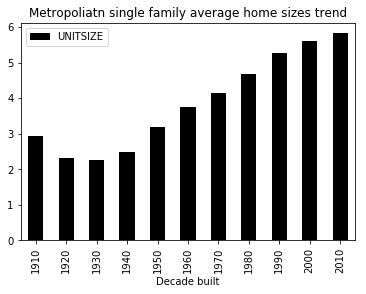

In [69]:
#plot 15 metropolitan areas average unit size by decade
munitsize_yr = metro_sfh.groupby('YRBUILT').mean().reset_index()
munitsize_yr.plot.bar(x='YRBUILT', y='UNITSIZE', color='black')
plt.title('Metropoliatn single family average home sizes trend')
plt.xlabel('Decade built')
#plt.yticks({'1':'< 500', '2':'500-749', '3':'750-799', '4':'1000-1499', '5':'1500-1999')

Text(0, 0.5, 'Total rooms')

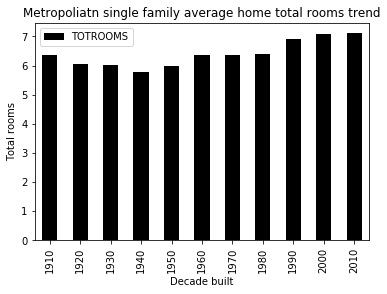

In [70]:
#plot 15 metropolitan areas average unit size by decade
mtotrms_yr = metro_sfh.groupby('YRBUILT').mean().reset_index()
mtotrms_yr.plot.bar(x='YRBUILT', y='TOTROOMS', color='black')
plt.title('Metropoliatn single family average home total rooms trend')
plt.xlabel('Decade built')
plt.ylabel('Total rooms')

Text(0.5, 1.0, 'Average stories in houses in large metropolitan areas')

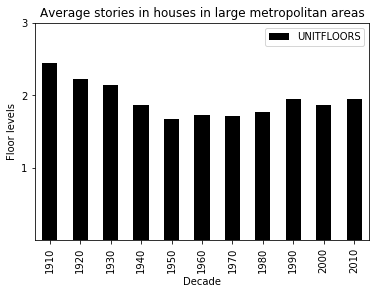

In [72]:
#Plot metro mean of stories of houses by decade
flr_dec_m= metro_sfh.groupby('YRBUILT')['UNITFLOORS'].mean().reset_index()
flr_dec_m.plot.bar(x='YRBUILT', y='UNITFLOORS', color='k')
plt.xlabel('Decade')
plt.ylabel('Floor levels')
plt.yticks(np.arange(1, 4, 1.0))
plt.title('Average stories in houses in large metropolitan areas')

Text(0.5, 1.0, 'Average separate dining areas in houses in large metropolitan areas')

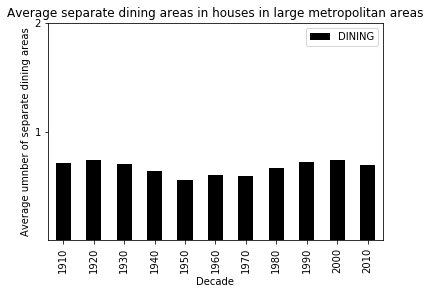

In [73]:
#Plot metro mean of separate dining areas in houses by decade
dr_dec_m= metro_sfh.groupby('YRBUILT')['DINING'].mean().reset_index()
dr_dec_m.plot.bar(x='YRBUILT', y='DINING', color='k')
plt.xlabel('Decade')
plt.ylabel('Average umnber of separate dining areas')
plt.yticks(np.arange(1, 3, 1.0))
plt.title('Average separate dining areas in houses in large metropolitan areas')